In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time
from statsmodels.tsa.stattools import adfuller

In [2]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [3]:
def perform_adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])

In [4]:
import pandas as pd

url_data = (r'https://raw.githubusercontent.com/nafissaad/Tutorial1/main/Tutorial/Time%20series/Time%20Series%20Analysis%20ritvikmath%20Nick%20DeRobertis/Coding%20the%20Sarima%20Model/catfish.csv')

series = pd.read_csv(url_data,index_col=0,parse_dates=[0],squeeze=True,date_parser=parser)
series=series.asfreq(pd.infer_freq(series.index))
series=series.loc[datetime(2004,1,1):]
series=series.diff().diff().dropna()
series.head()

Date
2004-03-01   -1067.0
2004-04-01   -4131.0
2004-05-01    3543.0
2004-06-01     401.0
2004-07-01    -405.0
Freq: MS, Name: Total, dtype: float64

In [5]:
perform_adf_test(series)#p_value less than 0.05 means the data is stationary

ADF Statistics: -7.162321
p-value: 0.000000


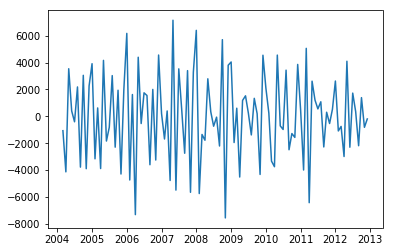

In [6]:
plt.plot(series)

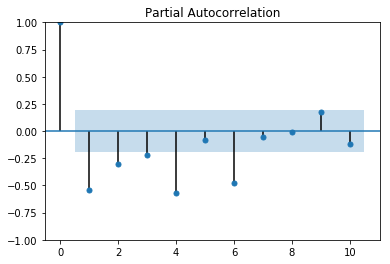

In [7]:
plot_pacf(series,lags=10,method='ywm')
plt.show()

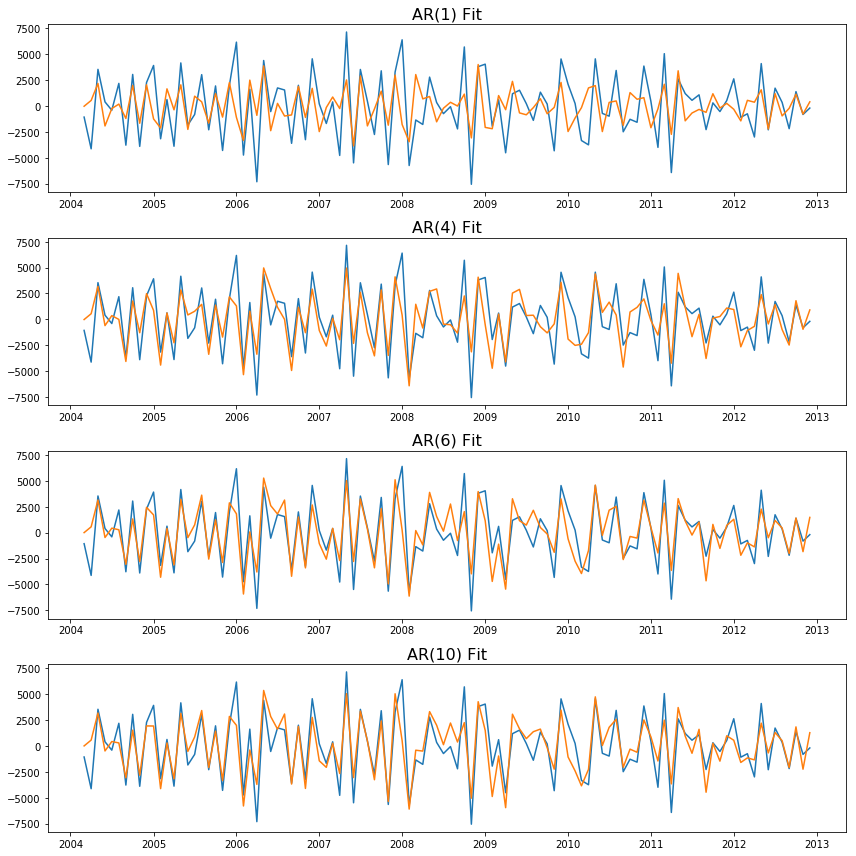

In [8]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()


In [9]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.86062174453
AIC for AR(4): 1927.609985266038
AIC for AR(6): 1899.6497442661591
AIC for AR(10): 1902.376545011473


In [10]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268662
BIC for AR(4): 1943.5906198307102
BIC for AR(6): 1920.9572570190558
BIC for AR(10): 1934.3378141408177


In [11]:
#lowest AIC and BIC the best fitted model